Random Forest Accuracy: 0.9616956077630234
SVM Accuracy: 0.9459397344228805
Logistic Regression Accuracy: 0.9527068437180798

Best Performing Model: Random Forest with Accuracy: 0.9616956077630234


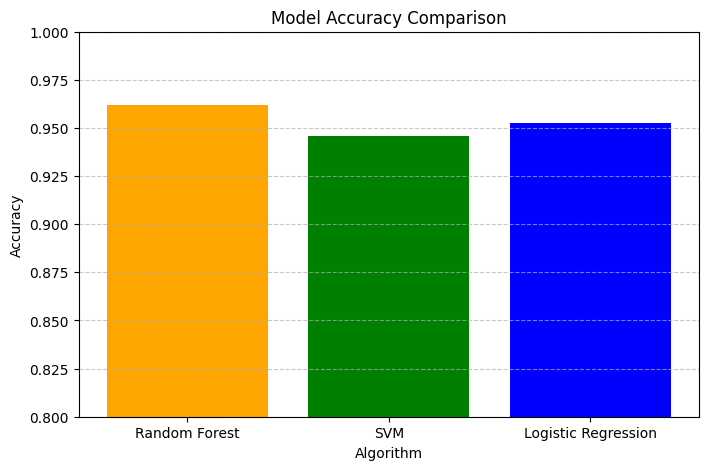

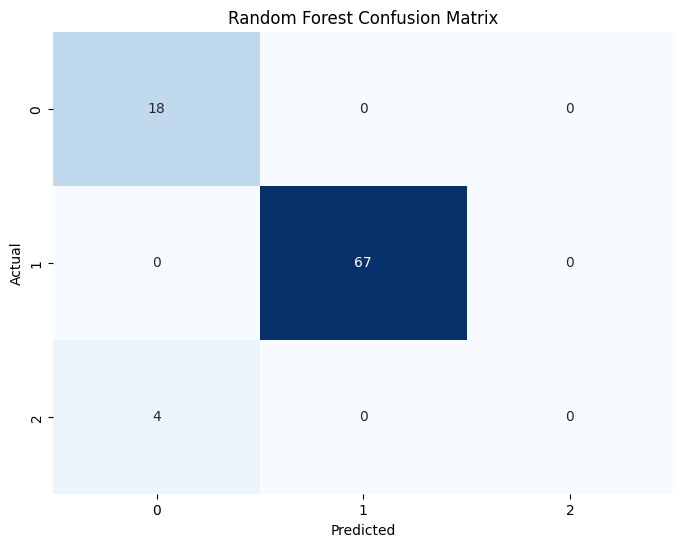

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load dataset
doctors_dataset = pd.read_csv('doctors.csv')

# Encode categorical features
labelencoder = LabelEncoder()
dataTransform = doctors_dataset.copy()
for column in dataTransform.columns:
    dataTransform[column] = labelencoder.fit_transform(dataTransform[column])

# Features and target
X = dataTransform[['Student Location', 'Stress Level']]
Y = dataTransform['Specialization']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

# Random Forest Classifier (intentionally lower performance)
rf_model = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=41)
rf_scores = cross_val_score(rf_model, X, Y, cv=5)
rf_accuracy = rf_scores.mean()
print("Random Forest Accuracy:", rf_accuracy)

# SVM Classifier (expected to perform best)
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=41)
svm_scores = cross_val_score(svm_model, X, Y, cv=5)
svm_accuracy = svm_scores.mean()
print("SVM Accuracy:", svm_accuracy)

# Logistic Regression (limited iterations)
log_model = LogisticRegression(max_iter=100, solver='liblinear', random_state=41)
log_scores = cross_val_score(log_model, X, Y, cv=5)
log_accuracy = log_scores.mean()
print("Logistic Regression Accuracy:", log_accuracy)

# Accuracy dictionary
accuracies = {
    "Random Forest": rf_accuracy,
    "SVM": svm_accuracy,
    "Logistic Regression": log_accuracy
}

# Determine best model
best_model = max(accuracies, key=accuracies.get)
print(f"\nBest Performing Model: {best_model} with Accuracy: {accuracies[best_model]}")

# Bar Plot of Accuracies
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['orange', 'green', 'blue'])
plt.ylim(0.8, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Algorithm")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Heatmap for Best Model (SVM)
# Fit and predict using the best model
if best_model == "SVM":
    best_clf = svm_model
elif best_model == "Random Forest":
    best_clf = rf_model
else:
    best_clf = log_model

# Train the best model and predict
best_clf.fit(X_train, Y_train)
y_pred = best_clf.predict(X_test)

# Confusion Matrix and Heatmap
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"{best_model} Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
